# Creating dataset

In [1]:
import numpy as np
import pandas as pd

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

from acquisition import sampling_fps
from phdtools.plots import get_axes

import matplotlib.pyplot as plt

-   shaped dataset

In [2]:
n_samples = 1500
noise = .18
state = 73

In [3]:
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=noise, random_state=state
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=state)

In [4]:
data = [
    noisy_circles,
    noisy_moons,
    blobs
]

fps_n_points = 500

fps_data = []

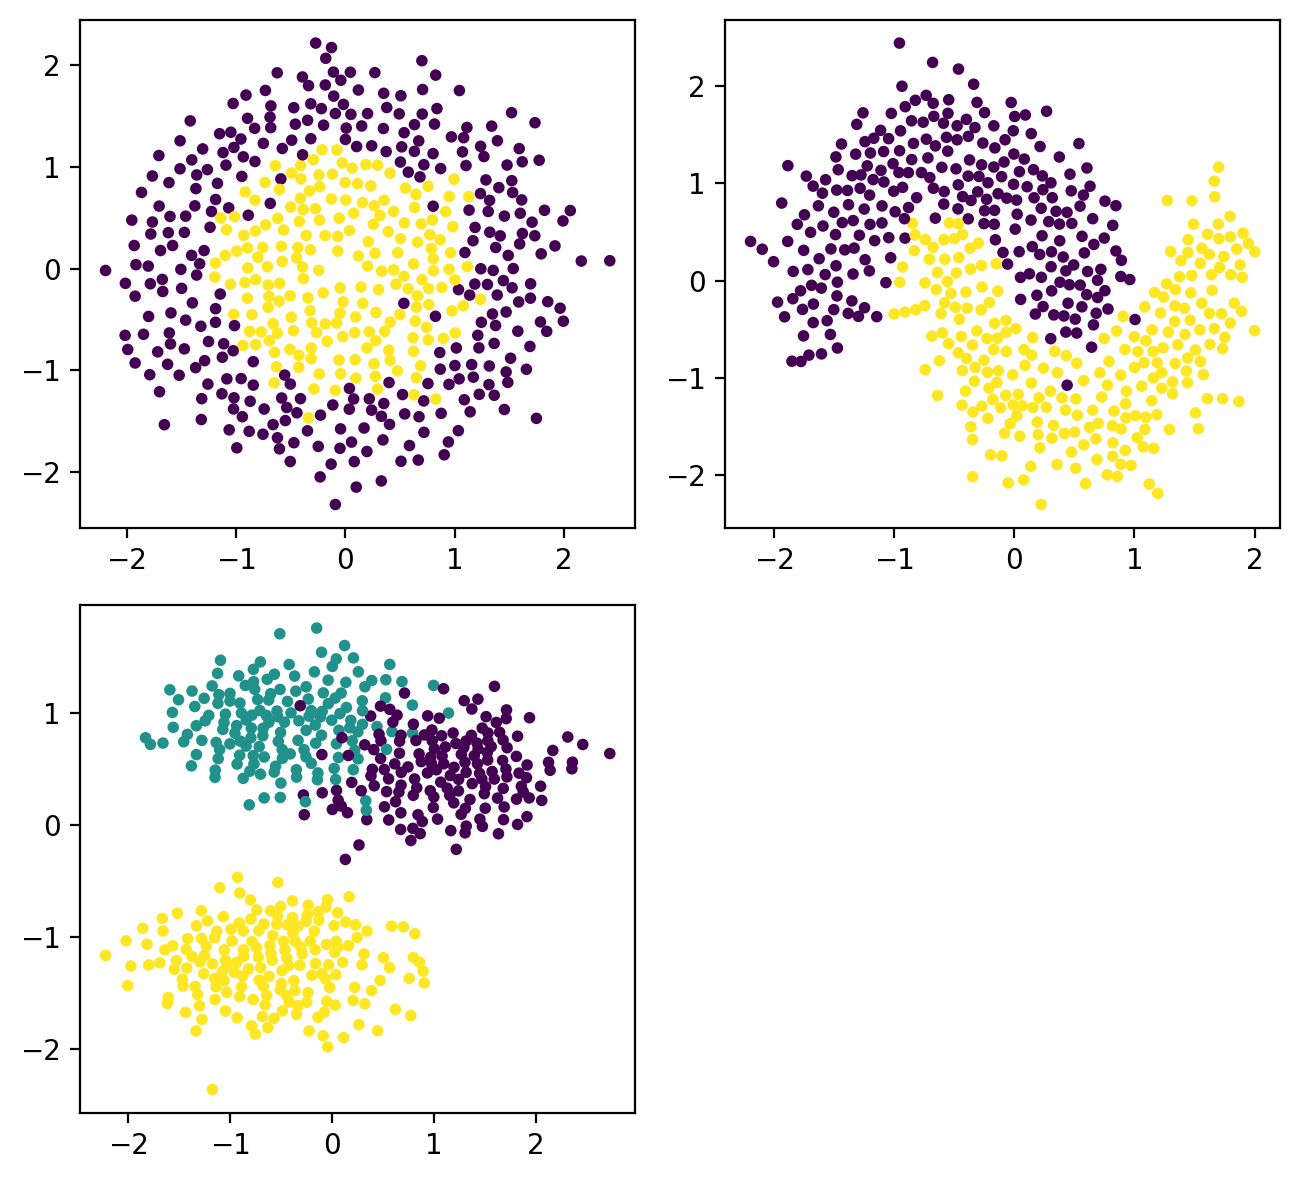

In [5]:
fig, ax = get_axes(len(data))

for i,d in enumerate(data):

    X, y = d
    fps_ndx = sampling_fps(X=X, n=fps_n_points)
    XX = StandardScaler().fit_transform(X[fps_ndx])
    fps_data.append((XX, y[fps_ndx]))

    ax[i].scatter(*XX.T, c=y[fps_ndx], s=10)

fig.tight_layout()

In [6]:
save_dir = '/home/andreag/Work/1.main_project/git_repo/ActiveLearningCLassiFier/example/dummy_dataset/'

In [7]:
data_names = ['noisy_circles', 'noisy_moons', 'blobs']

for i,data in enumerate(fps_data):

    X, y = data

    df = pd.DataFrame(data=np.hstack([X,y.reshape(-1,1)]), columns=['x','y','target'],)
    df_name = f'dummy_{data_names[i]}_phases{len(np.unique(y))}'
    df.to_csv(save_dir+df_name+'.csv', index=False)
    # np.savetxt(save_dir+df_name+'.target', y)

-   random distribution

In [8]:
rng = np.random.RandomState(state)
no_structure_2d = rng.rand(n_samples, 2)

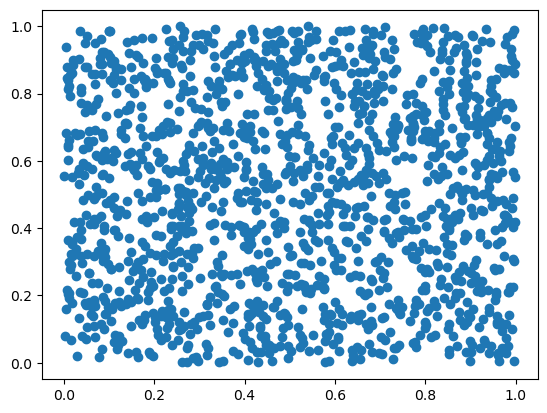

In [9]:
plt.scatter(*no_structure_2d.T)

In [10]:
no_structure_3d = rng.rand(n_samples*4, 3)

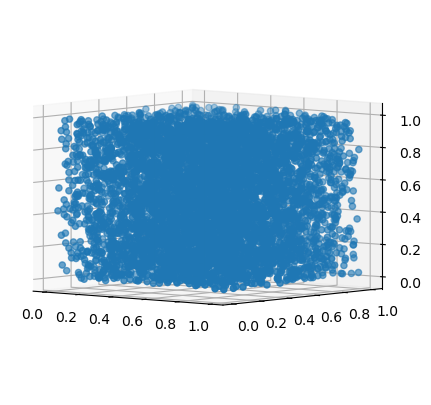

In [11]:
fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(*no_structure_3d.T)

ax.set_proj_type('ortho')

ax.azim = -50
ax.dist = 20
ax.elev = 5


## Clustering algos to generate phases

In [12]:
n_phases = 5

In [13]:
ward = cluster.AgglomerativeClustering(n_clusters=n_phases, linkage="ward")
gmm = mixture.GaussianMixture(
    n_components=n_phases,
    covariance_type="full",
    random_state=state,
)
spectral = cluster.SpectralClustering(n_clusters=n_phases,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=state)

In [14]:
cluster_methods = [
    ward,
    gmm,
    spectral
]

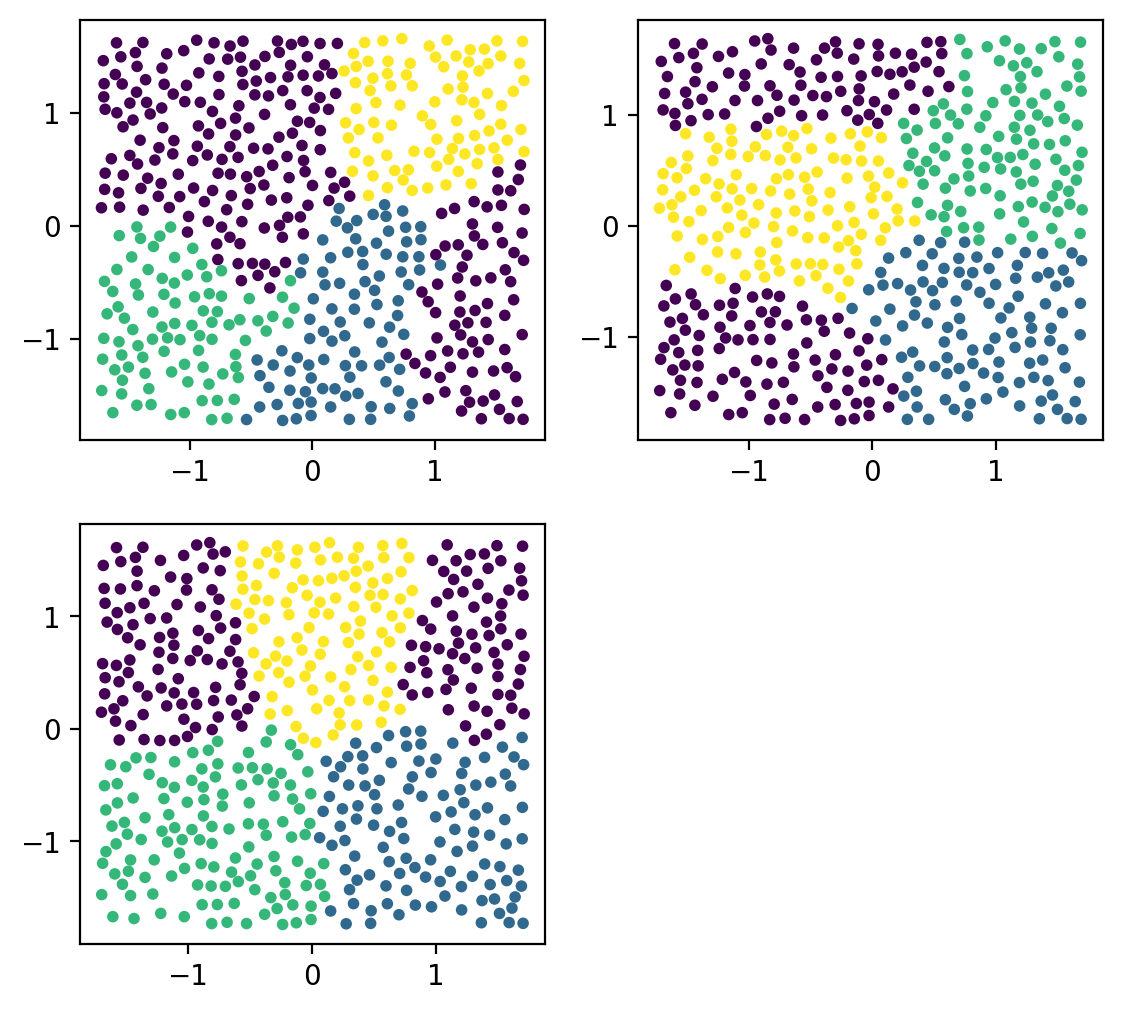

In [25]:
test_rngspace_2d = []

fig, ax = get_axes(len(cluster_methods))

for i,clf in enumerate(cluster_methods):

    y = clf.fit_predict(no_structure_2d)

    fps_ndx = sampling_fps(X=no_structure_2d, n=fps_n_points)
    X = no_structure_2d[fps_ndx]
    XX = StandardScaler().fit_transform(X)
    y = y[fps_ndx]

    mod_y = []
    for j,cl in enumerate(y):
        if cl == np.unique(y)[-1]:
            mod_y.append(0)
        else:
            mod_y.append(cl)


    # test_rngspace_2d.append((XX,y))
    test_rngspace_2d.append((XX,np.array(mod_y)))

    ax[i].scatter(*XX.T, c=mod_y, s=10)

In [26]:
data_names = ['ward', 'gmm', 'spectral']

for i,data in enumerate(test_rngspace_2d[:]):

    X, y = data

    df = pd.DataFrame(data=np.hstack([X,y.reshape(-1,1)]), columns=['x','y','target'],)
    df_name = f'aniSpace2D_{data_names[i]}_phases{len(np.unique(y))}'
    df.to_csv(save_dir+df_name+'.csv', index=False)
    # np.savetxt(save_dir+df_name+'.target', y)

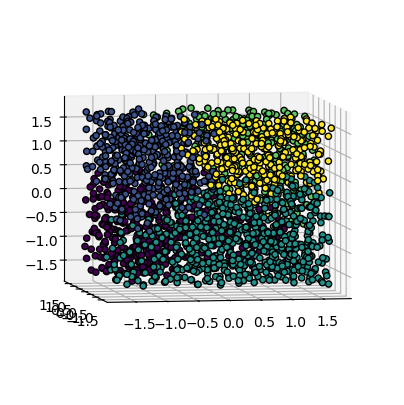

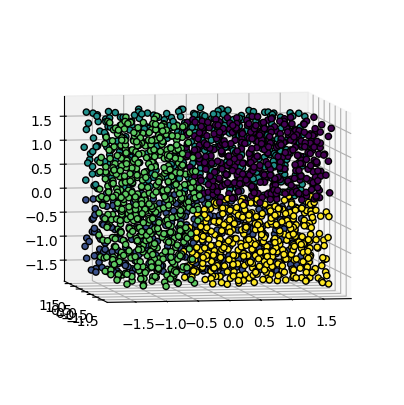

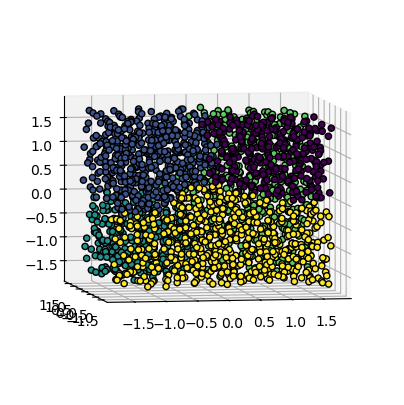

In [17]:
test_rngspace_3d = []

for i,clf in enumerate(cluster_methods):

    y = clf.fit_predict(no_structure_3d)

    fps_ndx = sampling_fps(X=no_structure_3d, n=fps_n_points*4)
    X = no_structure_3d[fps_ndx]
    XX = StandardScaler().fit_transform(X)
    y = y[fps_ndx]

    test_rngspace_3d.append((XX,y))

    fig = plt.figure(figsize = (5,5))
    ax = plt.axes(projection='3d')
    ax.grid()

    ax.scatter(*XX.T, c=y, alpha=1.,
        edgecolor='0.')

    ax.set_proj_type('ortho')

    ax.azim = -100
    ax.dist = 20
    ax.elev = 5

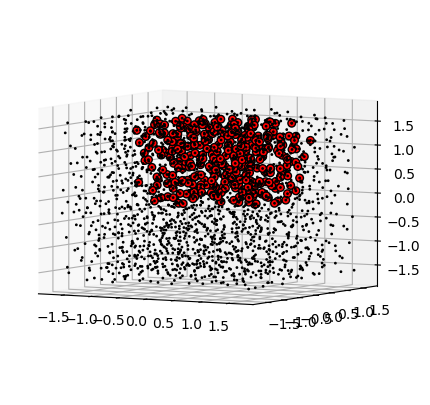

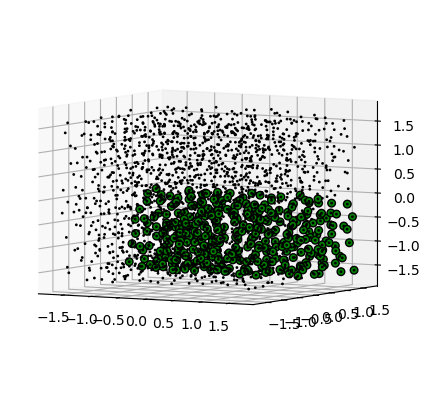

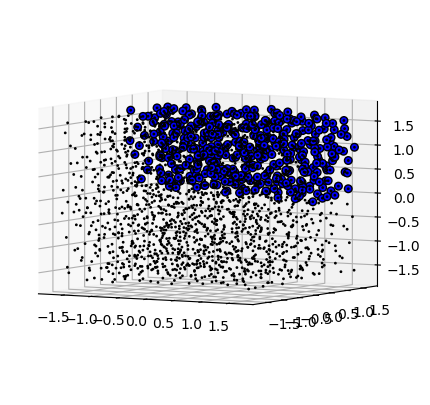

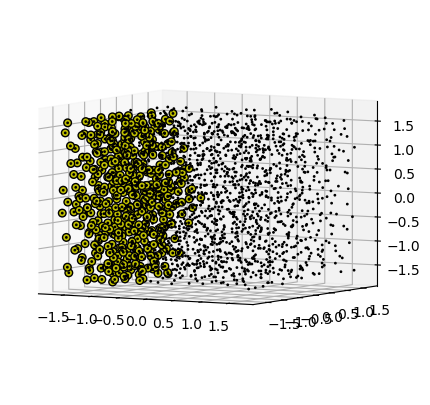

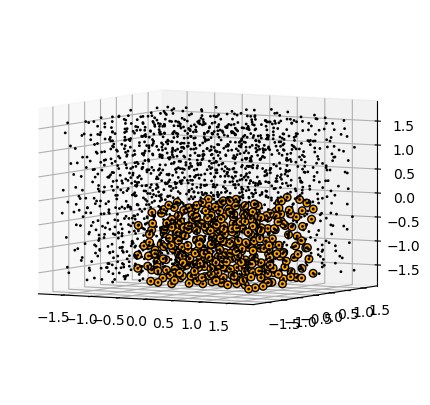

In [18]:
data_sel = test_rngspace_3d[1]

colours = ['r', 'g', 'b', 'y', 'orange', 'gold', 'purple']

for c in np.unique(data_sel[1]):

    mask = [ndx for ndx,_ in enumerate(data_sel[0]) if data_sel[1][ndx] == c]

    fig = plt.figure(figsize = (5,5))
    ax = plt.axes(projection='3d')
    ax.grid()

    ax.scatter(*data_sel[0][mask].T, alpha=1.,
               s=30,
               c=colours[c], edgecolor='0.')
    ax.scatter(*data_sel[0].T, alpha=1.,
               s=1,
               c='k', edgecolor='0.')

    ax.set_proj_type('ortho')

    ax.azim = -60
    ax.dist = 20
    ax.elev = 5

In [19]:
data_names = ['ward', 'gmm', 'spectral']

for i,data in enumerate(test_rngspace_3d[:]):

    X, y = data

    df = pd.DataFrame(data=np.hstack([X,y.reshape(-1,1)]), columns=['x','y','z','target'],)
    df_name = f'aniSpace3D_{data_names[i]}_phases{len(np.unique(y))}'
    df.to_csv(save_dir+df_name+'.csv', index=False)
    # np.savetxt(save_dir+df_name+'.target', y)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
 2   z       2000 non-null   float64
 3   target  2000 non-null   float64
dtypes: float64(4)
memory usage: 62.6 KB
